6.239988622166991
4.164798117778368
4.016046794896866
4.001600495406876
4.000162423523078
3.999911513119514
4.019007349143068
0.0
222.04460492503128
0.0


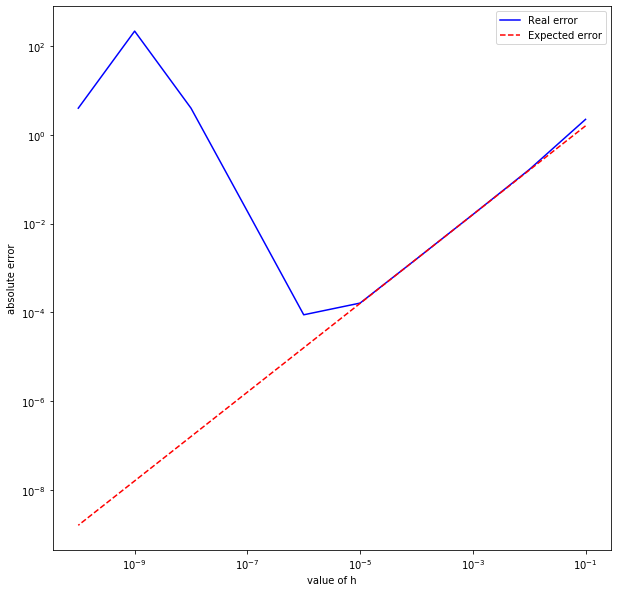

In [1]:
import matplotlib.pyplot as plt
from matplotlib import figure
import math
import numpy as np

#define the function
def f(x):
    return math.tan(x)

#define the hand calculated second derivative
def f_second_deriv(x):
    return 2 * ((1/math.cos(x))**2) * math.tan(x)

#define the hand calculated third derivative to calculate the expected error
def f_third_deriv(x):
    return (2 * ((1/math.cos(x))**2))  * (((1/math.cos(x))**2) + 2 * (math.tan(x)**2))

#params:
# f: function
# x_0: point to evaluate at
# h: step size -> 1e-h
# Calculate second derivative by using the forward difference formula in O(h) precision
def TwoPointForwardSecondDeriv(f, x_0, h):
    return (f(x_0) - 2 * f(x_0 + h) + f(x_0 + 2*h)) / h**2  
        
#initializing lists to hold h and error values,
err_list = []
err_list2 = []
h_list = []

#loop for h = 1 until h > 11 (step size is 1e-h)
for h in range(1, 11):

    #add the h value to the list to use it in the chart later on
    h_list.append(10**(-h))

    #storing the value in a temporary variable to calculate the error
    temp = TwoPointForwardSecondDeriv(f, math.pi/4, 10**(-h))
    temp2 = ((10**(-h)) * f_third_deriv(math.pi/4))
    
    #calculate the error and push to the list
    err_list.append(abs(float(temp - f_second_deriv(math.pi/4))))
    err_list2.append(abs(temp2))
    print(temp)

#setting figure size
plt.figure(figsize=(10,10))

#plotting for every error list
plt.plot(h_list, err_list, "-b", label="Real error")
plt.plot(h_list, err_list2, "--r", label="Expected error")

#changing the x and y scalings to logarithmic
plt.xscale("log")
plt.yscale("log")

#setting the axis labels
plt.xlabel("value of h")
plt.ylabel("absolute error")

#adding the legend to the top left corner and showing the plot
plt.legend(loc="upper right")
plt.show()


In [2]:
for i in range(1, 11):
    print("h = 1e-" + str(i) + " Real Error: " + f"{err_list[i-1]:.20f}" + " Expected Error: " + f"{err_list2[i-1]:.20f}")

h = 1e-1 Real Error: 2.23998862216699246019 Expected Error: 1.59999999999999942268
h = 1e-2 Real Error: 0.16479811777836905762 Expected Error: 0.15999999999999992006
h = 1e-3 Real Error: 0.01604679489686722249 Expected Error: 0.01599999999999999339
h = 1e-4 Real Error: 0.00160049540687756675 Expected Error: 0.00159999999999999943
h = 1e-5 Real Error: 0.00016242352307971331 Expected Error: 0.00015999999999999993
h = 1e-6 Real Error: 0.00008848688048468389 Expected Error: 0.00001599999999999999
h = 1e-7 Real Error: 0.01900734914306889678 Expected Error: 0.00000160000000000000
h = 1e-8 Real Error: 3.99999999999999866773 Expected Error: 0.00000016000000000000
h = 1e-9 Real Error: 218.04460492503127966302 Expected Error: 0.00000001600000000000
h = 1e-10 Real Error: 3.99999999999999866773 Expected Error: 0.00000000160000000000


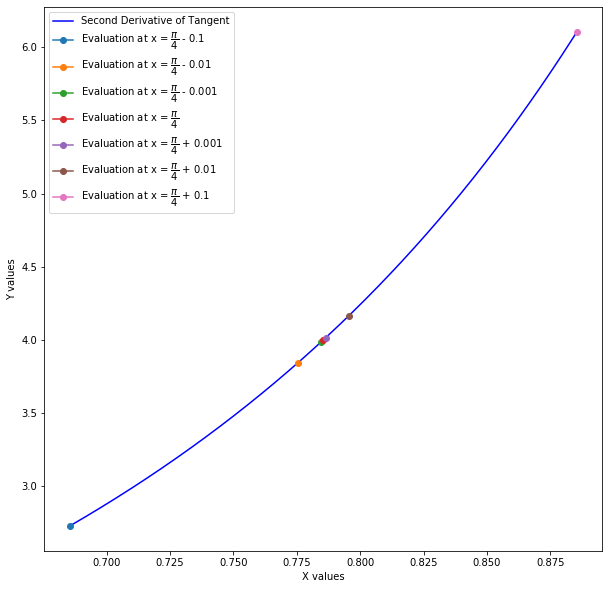

In [3]:
#create an equally distrubuted point list around pi/4
x_list = np.linspace(math.pi/4 - 0.1, math.pi/4 + 0.1, 1000)
x_list2 = [math.pi/4 - 0.1, math.pi/4 - 0.01, math.pi/4 - 0.001, math.pi/4, math.pi/4 + 0.001, math.pi/4 + 0.01, math.pi/4 + 0.1]
y_list = []
y_list2 = []
#evaluate the tangent function for every point in the x_list and add them to the y_list
for item in x_list:
    y_list.append(f_second_deriv(item))

#evaluate the function around the important point
for item in x_list2:
    y_list2.append(f_second_deriv(item))
    
#setting figure size
plt.figure(figsize=(10,10))

#plotting the tangent function and marking pi/4 and two close points to show the ill-condition
plt.plot(x_list, y_list, "-b", label="Second Derivative of Tangent")
plt.plot(x_list2[0], y_list2[0], marker = "o", label="Evaluation at x = $\dfrac{\pi}{4}$ - 0.1")
plt.plot(x_list2[1], y_list2[1], marker = "o", label="Evaluation at x = $\dfrac{\pi}{4}$ - 0.01")
plt.plot(x_list2[2], y_list2[2], marker = "o", label="Evaluation at x = $\dfrac{\pi}{4}$ - 0.001")
plt.plot(x_list2[3], y_list2[3], marker = "o", label="Evaluation at x = $\dfrac{\pi}{4}$")
plt.plot(x_list2[4], y_list2[4], marker = "o", label="Evaluation at x = $\dfrac{\pi}{4}$ + 0.001")
plt.plot(x_list2[5], y_list2[5], marker = "o", label="Evaluation at x = $\dfrac{\pi}{4}$ + 0.01")
plt.plot(x_list2[6], y_list2[6], marker = "o", label="Evaluation at x = $\dfrac{\pi}{4}$ + 0.1")

#setting the axis labels
plt.xlabel("X values")
plt.ylabel("Y values")

#adding the legend to the top left corner and showing the plot
plt.legend(loc="upper left")
plt.show()

In [4]:
for i in range(len(x_list2)):
    print("X value: " + str(x_list2[i]) + " Y value: " + str(y_list2[i]))

X value: 0.6853981633974483 Y value: 2.7284549238953097
X value: 0.7753981633974483 Y value: 3.843916264804507
X value: 0.7843981633974483 Y value: 3.9840399148290433
X value: 0.7853981633974483 Y value: 3.9999999999999987
X value: 0.7863981633974483 Y value: 4.01604008549629
X value: 0.7953981633974483 Y value: 4.164086989513969
X value: 0.8853981633974483 Y value: 6.105089583871012
